<a href="https://colab.research.google.com/github/GGMmattos/Machine-Learning-And-Data-Science/blob/main/ArvoreDeDecis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arvore de decisão

Importação da árvore

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Base Risco de Credito

In [4]:
import pickle 
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [5]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [6]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [12]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito) #Onde ocorre o treinamento, o fit encaixa dos dados no algoritmo
#primeiro parametr atributo previsor, segundo parametro são as classes

DecisionTreeClassifier(criterion='entropy')

In [33]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

In [36]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

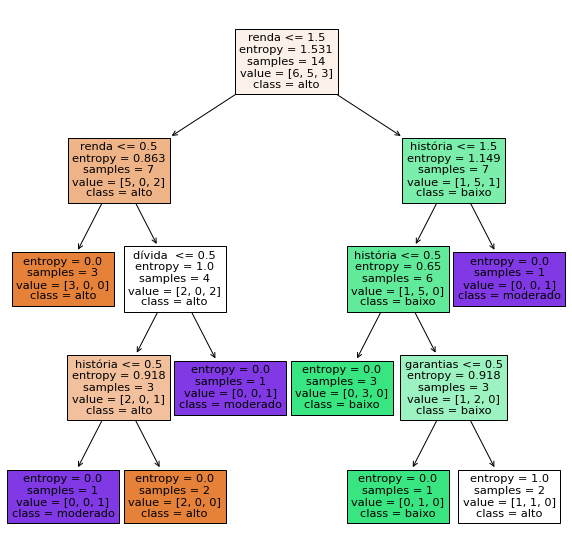

In [40]:
from sklearn import tree 
import matplotlib.pyplot as plt #biblioteca pra a vizualização de gráficos
previsores = ['história', 'dívida ','garantias','renda']
figura,eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10)) #melhorando a visualização (quantidade de linha, quantidade de coluna e tamanho da figura)
tree.plot_tree(arvore_risco_credito,feature_names=previsores, class_names = arvore_risco_credito.classes_, filled = True);  #criação da arvore, em forma de gráfico, o FILLED adiciona a cor para distinguir, 

Teste de previsões

In [43]:
#historia boa, dívida alta, garantias nenhuma, renda > 35
#história ruim, dívida alta, garantia adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)